# Lab 2

## Q3)

In [148]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

% matplotlib inline

In [149]:
# beta values
beta_0 = -3
beta_1 = 0
beta = [beta_0, beta_1]
#error array
err = []

#population size
n = 150

1. use normal equations to find $ \hat \beta $


$ \hat \beta = (X_{i}^{T}X_{i})^{-1} X_{i}^{T}y$
2. for each iteration
    * create data (random sample from n = 150), compute beta_hat, record standard error


3. find the standard deviation of the standard error at the end. Compare to -0.15 and argue about the significance of this value



In [150]:
for _ in range(100):
    x = np.random.randn(n,)
    e = np.random.randn(n,)
    y = beta_0 + beta_1*x + e
    x_n = np.transpose(np.stack((np.ones(len(x),), x), axis=0))
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x_n.T,x_n)),x_n.T),y)
    err.extend(abs(beta-beta_hat))
    
std = np.std(np.array(err))

print("Empirical standard deviation of the error: " + str(std))
print("Mean: " + str(np.mean(np.array(err))))
    
    

Empirical standard deviation of the error: 0.05057124627335102
Mean: 0.06719501737912448


The value of -0.15 is insignificant because it is more than 2 standard deviations away from the mean.

Repeating the experiment for different values of n. Plot these values, and on the same plot, plot $ \frac{1}{\sqrt{n}} $. How is the fit?


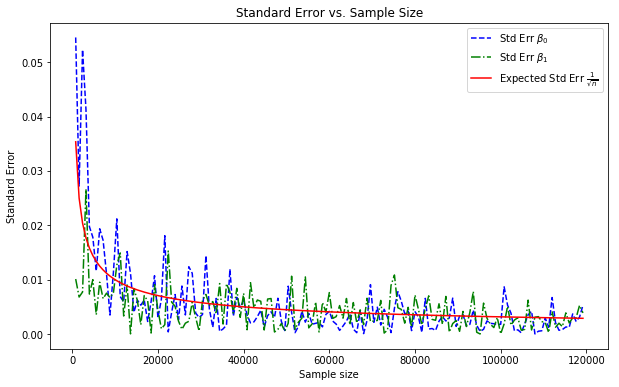

In [173]:
sizes = 800*np.arange(1,150)

err_beta0 = []
err_beta1 = []

for size in sizes:
    x = np.random.randn(size,)
    e = np.random.randn(size,)
    y = beta_0 + beta_1*x + e
    x_n = np.transpose(np.stack((np.ones(len(x),), x), axis=0))
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x_n.T,x_n)),x_n.T),y)
    err_beta0.append(abs(beta[0]-beta_hat[0]))
    err_beta1.append(abs(beta[1]-beta_hat[1]))

fig = plt.figure(figsize=(10,6))
plt.title("Standard Error vs. Sample Size")
plt.xlabel("Sample size")
plt.ylabel("Standard Error")
plt.plot(sizes,err_beta0, 'b--', label=r'Std Err $ \beta_0 $')
plt.plot(sizes,err_beta1, 'g-.', label=r'Std Err $ \beta_1 $')
plt.plot(sizes,1/np.sqrt(sizes), 'r', label=r'Expected Std Err $ \frac{1}{\sqrt{n}} $')
plt.legend()
plt.show()